# EXPERIMENTATION
Before starting off with the project a brief experiment is done to demonstrate the process of colour segmentation



# STEP1:Read the image

In [16]:
%matplotlib inline
import cv2 
import numpy as np
import matplotlib.pyplot as plt


# STEP2: Display the image

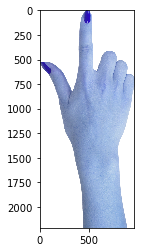

In [17]:

img = cv2.imread('test_image.png')
plt.imshow(img,cmap = 'gray')
plt.show()

# STEP3: Convert color space and create image mask

In [27]:
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
lower_red=np.array((160,100,100))
upper_red=np.array((179,255,255))
mask = cv2.inRange(hsv,lower_red,upper_red)

kernel = np.ones(shape=(3,3))
ret,mask = cv2.threshold(mask,127,255,0)



Close = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,kernel,iterations=3)

res=cv2.bitwise_and(img,img,mask=Close)

#_, contours, _ = cv2.findContours(res, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#im = np.copy(img)
#cv2.drawContours(im, contours, -1, (0, 255, 0), 1)


# Contouring


In [25]:


    #convert BGR to HSV
imgHSV= cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
lowerBound=np.array((160,100,100))
upperBound=np.array((179,255,255))
kernel = np.ones(shape=(3,3))

    # create the Mask
mask=cv2.inRange(imgHSV,lowerBound,upperBound)
    #morphology
maskOpen=cv2.morphologyEx(mask,cv2.MORPH_OPEN,kernel)
maskClose=cv2.morphologyEx(maskOpen,cv2.MORPH_CLOSE,kernel)

maskFinal=maskClose
_,conts,h=cv2.findContours(maskFinal.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
if(len(conts)==2):
        x1,y1,w1,h1=cv2.boundingRect(conts[0])
        x2,y2,w2,h2=cv2.boundingRect(conts[1])
        cv2.rectangle(img,(x1,y1),(x1+w1,y1+h1),(255,0,0),2)
        cv2.rectangle(img,(x2,y2),(x2+w2,y2+h2),(255,0,0),2)
        cx1=x1+w1/2
        cy1=y1+h1/2
        cx2=x2+w2/2
        cy2=y2+h2/2
        cx=(cx1+cx2)/2
        cy=(cy1+cy2)/2
        cv2.line(img, (int(cx1),int(cy1)),(int(cx2),int(cy2)),(255,0,0),2)
        cv2.circle(img, (int(cx),int(cy)),2,(0,0,255),2)
        
       

# STEP4: Display the resulting image

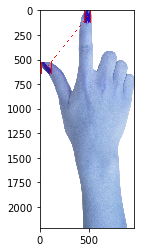

In [26]:
plt.imshow(img)
plt.show()

# STEP5: Load Video Source and apply the above filter to it

In [ ]:
lower_red = np.array((160,100,100))
upper_red = np.array((179,255,255))
kernel = np.ones((3,3))
cap = cv2.VideoCapture(0)
while True:
    ret,frame = cap.read()
    hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv,lower_red,upper_red)
    
    #med = cv2.medianBlur(mask,3)
    #maskOpen = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,kernel)
    
    maskClose = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,kernel,iterations =3)
    
    res=cv2.bitwise_and(frame,frame,mask=maskClose)
    
    
    #cv2.findContours(res,cv2.RETR_EXTERNAL)
    cv2.imshow('frame',res)
    if(cv2.waitKey(1) & 0xff == ord('q')):
        break
cap.release()
cv2.destroyAllWindows()